In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

Using TensorFlow backend.


In [2]:
Xtest = np.load("C:\\Users\\talha\\Video_Forgery_Detection_Using_Machine_Learning-master\\video_tampering_dataset\\Xtrain.npy")
Ytest = np.load("C:\\Users\\talha\\Video_Forgery_Detection_Using_Machine_Learning-master\\video_tampering_dataset\\Ytrain.npy")

In [3]:
print(Xtest.shape)
print(Ytest.shape)

(3495, 240, 320, 3)
(3495,)


In [4]:
model = load_model("C:\\Users\\talha\\Video_Forgery_Detection_Using_Machine_Learning-master\\ResNet50_Model\\forgery_model.hdf5")

In [5]:
outputs = model.predict(Xtest)

In [7]:
outputs = outputs.reshape((-1))
print(outputs.shape)

(3495,)


In [8]:
for i in range(outputs.shape[0]):
    if outputs[i] > 0.5:
        outputs[i] = 1
    else:
        outputs[i] = 0

In [9]:
print(outputs)

[0. 1. 1. ... 1. 0. 0.]


In [10]:
positiveCount = 0
for i in range(Xtest.shape[0]):
    if outputs[i] == Ytest[i]:
        positiveCount +=1

print("Test Accuracy = ",positiveCount/Ytest.shape[0])

Test Accuracy =  0.6600858369098712


In [12]:
from sklearn.metrics import classification_report,confusion_matrix
from visualize import plot_confusion_matrix

In [13]:
print(classification_report(outputs,Ytest))

              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75      2962
         1.0       0.31      1.00      0.47       533

    accuracy                           0.66      3495
   macro avg       0.65      0.80      0.61      3495
weighted avg       0.89      0.66      0.71      3495



In [14]:
cnf_matrix = confusion_matrix(outputs,Ytest)
print(cnf_matrix)

[[1776 1186]
 [   2  531]]


Confusion matrix, without normalization
[[1776 1186]
 [   2  531]]


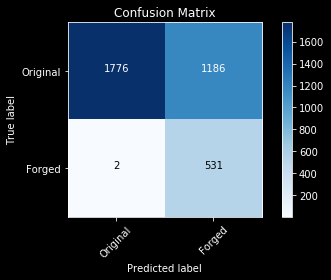

In [15]:
plt.style.use('dark_background')
plot_confusion_matrix(cnf_matrix,classes = ["Original","Forged"],title="Confusion Matrix")